# N Body Problem

In physics the problem of two bodies orbiting one another can be solved neatly, and analytically.
Likewise, approximates can be made for a 3 or 4 body system assuming that the additional bodies
have masses much smaller than the original 2. However, as soon as we deal with the problem of
more than 2 bodies of equivalent mass things become chaotic and require numerical methods to
solve them. This is the N-body problem is physics.<br>

The physics of the N-body problem is governed by the equations of gravity so that for the i
th body of the system the force from the other bodies in a system of N-bodies is

$$Fi=M_i a_i=M_i\frac{d^2x}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^2}$$

You have the following system, two stars of equal mass orbit around their common center of mass
a distance of 50 AU apart. <br>
A third star with mass of 1/2 that of the inner two stars orbits the center of mass of the system with a pericenter of 30 AU and a apocenter of 2000 AU. The orbit of the 3rd star is also inclined relative to the plane of the inner two stars by 13 degrees. Starting star 3 at its apocenter, <br>

Do the calculation for a clockwise and counterclockwise rotation for M1 and M2.

<br>

Start your calculation with 1000 timesteps and then explore what occurs when you increase or decrease the number of timesteps. Do you notice any computational glitches? Do you believe your
answers?

When number of timesteps N is decreased, velocity and acceleration of orbits are calculated at very few points. But when N is increased velocity and accelerations are calculated at each of those points. Hence, a higher N is more 
helpful in determining trends in velocities and accelerations with time.

For each case make the following plots.<br>
• Magnitude of the velocity and acceleration of the stars as a function of time.<br>
• Orbits of the three stars as a function of time.

Required for the graduate students, option for undergraduates.
• We have initially assumed M3 = 1 M

Run the code assuming M3 = [0.1,1.0,2.0,5.0] $M_{\odot}$

What differences do you see?

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
#constants
G=4*np.pi*np.pi

#M1=M2=M=1 Solar mass
M=1
M1=M
M2=M


#delta(inclination with the z axis)
delta=13*(np.pi/180)

In [90]:
def f(s,t):
    '''Computes the derivative of s at t=0 for star 3'''
    x=s[0]
    y=s[1]
    z=s[2]
    
    
    vx=s[3]
    vy=s[4]
    vz=s[5]
    r=np.sqrt(x*x+y*y+z*z)
    ax=G*(M1+M2)*x/(r*r*r)
    ay=G*(M1+M2)*y/(r*r*r)
    az=G*(M1+M2)*z/(r*r*r)
   
    return np.array([vx,vy,vz,ax,ay,az],float)


In [91]:
def RK4(s,t):
    '''Solves for r, velocity for star star 3 '''
    x=[]
    y=[]
    z=[]
    
    vx=[]
    vy=[]
    vz=[]
    
    h=t[1]-t[0]
    
    for i in t:
        x.append(s[0])
        y.append(s[1])
        z.append(s[2])
        
        vx.append(s[3])
        vy.append(s[4])
        vz.append(s[5])
        
        
        k1=h*f(s,i)
        k2=h*f(s+0.5*k1,i+0.5*h)
        k3=h*f(s+0.5*k2,i+0.5*h)
        k4=h*f(s+k3,i+h)
        s=s+((k1+2*k2+2*k3+k4)/6)
        
    return x,y,z,vx,vy,vz

In [92]:
def f12(s1,s2,s,t,star,M3):
    '''Computes the derivative of r and velocity at t=0 for star 1,2'''
    x1=s1[0]
    y1=s1[1]
    z1=s1[2]
    
    vx1=s1[3]
    vy1=s1[4]
    vz1=s1[5]
    
    x2=s2[0]
    y2=s2[1]
    z2=s2[2]
    
    vx2=s2[3]
    vy2=s2[4]
    vz2=s2[5]
    
    x3=s[0]
    y3=s[1]
    z3=s[2]
    r10=25
    r20=r10
    r30=2000
    r12=50
    

    if(star==1):
        vx=vx1
        vy=vy1
        vz=vz1
        r13=np.sqrt(r10*r10+r30*r30)
        ax=(G*M2*(x2-x1)/(r12*r12*r12))+(G*M3*(x3-x1)/(r13*r13*r13))
        ay=(G*M2*(y2-y1)/(r12*r12*r12))+(G*M3*(y3-y1)/(r13*r13*r13))
        az=(G*M2*(z2-z1)/(r12*r12*r12))+(G*M3*(z3-z1)/(r13*r13*r13))
        
    else:
        vx=vx2
        vy=vy2
        vz=vz2
        r23=np.sqrt(r20*r20+r30*r30)
        ax=(G*M1*(x1-x2)/(r12*r12*r12))+(G*M3*(x3-x2)/(r23*r23*r23))
        ay=(G*M1*(y1-y2)/(r12*r12*r12))+(G*M3*(y3-y2)/(r23*r23*r23))
        az=(G*M1*(z1-z2)/(r12*r12*r12))+(G*M3*(z3-z2)/(r23*r23*r23))
    return np.array([vx,vy,vz,ax,ay,az],float)

def RK412(s1,s2,s,t,star,M3):
    '''Solves for x,y,z velocity for star star 1,2 '''
    x=[]
    y=[]
    z=[]
    
    vx=[]
    vy=[]
    vz=[]
    h=t[1]-t[0]
   
    for i in t:
        if(star==1):
            x.append(s1[0])
            y.append(s1[1])
            z.append(s1[2])

            vx.append(s1[3])
            vy.append(s1[4])
            vz.append(s1[5])
            
            k1=h*f12(s1,s2,s,i,1,M3)
            k2=h*f12(s1+0.5*k1,s2,s,i+0.5*h,1,M3)
            k3=h*f12(s1+0.5*k2,s2,s,i+0.5*h,1,M3)
            k4=h*f12(s1+k3,s2,s,i+h,1,M3)
            s1=s1+((k1+2*k2+2*k3+k4)/6)
            
        elif(star==2):
            x.append(s2[0])
            y.append(s2[1])
            z.append(s2[2])

            vx.append(s2[3])
            vy.append(s2[4])
            vz.append(s2[5])
            
            k1=h*f12(s1,s2,s,i,2,M3)
            k2=h*f12(s1,s2+0.5*k1,s,i+0.5*h,2,M3)
            k3=h*f12(s1,s2+0.5*k2,s,i+0.5*h,2,M3)
            k4=h*f12(s1,s2+k3,s,i+h,2,M3)
            s2=s2+((k1+2*k2+2*k3+k4)/6)
    return x,y,z,vx,vy,vz

In [93]:
##############################INITIAL CONDITIONS#########################################
#star 1----------------------------------------------------------------------------------
#Initial x,y,z
x10=0
y10=-25
z10=0

r10=25
#initial velocity
v10x=np.sqrt(G*M2**2/((2*r10)*(M1+M2)))
v10y=0
v10z=0

#anticlockwise initial conditions
s1_ac=np.array([x10,y10,z10,v10x,v10y,v10z])

#clockwise initial conditions
s1_c=np.array([x10,y10,z10,-v10x,v10y,v10z])

#star2-----------------------------------------------------------------------------------
#initial x,y,z
x20=0
y20=25
z20=0

r20=25
#initial velocity
v20x=-np.sqrt(G*M1**2/((2*r10)*(M1+M2)))
v20y=0
v20z=0

#anticlockwise initial conditions
s2_ac=np.array([x20,y20,z20,v20x,v20y,v20z])

s2_c=np.array([x20,y20,z20,-v20x,v20y,v20z])


#star3----------------------------------------------------------------------------------
r0=2000
#initial x,y,z
x30=-2000*np.cos(delta)
y30=-2000*np.sin(delta)
z30=0

#Initial velocity
a=2030/2
v0=np.sqrt(G*(M1+M2)*((2/r0)-(1/a)))
v30x=0
v30y=v0*np.cos((np.pi/2)-delta)
v30z=-v0*np.sin((np.pi/2)-delta)

#array s with initial values
#anti clockwise direction
s_ac=np.array([x30,y30,z30,v30x,v30y,v30z])

#clockwise direction
s_c=np.array([x30,y30,z30,v30x,-v30y,-v30z])
########################################################################################

In [105]:
def calculate(N1,m3):
    '''Calculates r,v,a for stars 1,2,3 and produce plots'''
    '''Returns 2 figures, fig-r vs t in xyz planes and fig1-velocity vs t,acceleration vs t'''
    #For star 3
    M3=m3
    #semi-major axis
    a=2030/2

    #epicenter
    b=np.sqrt(2000*30)

    #period of star 3
    p=2*np.pi*np.sqrt((a*a*a)/(G*(M1+M2+M3)))#timesteps
    N=N1

    #time star 3
    t=np.linspace(0,p,N)


    #########calculation of r,v,a#################################################################
    
    #star3---------------------------------------------------------------------------------------
    #positions and velocities for star 3
    x3,y3,z3,v3x,v3y,v3z=RK4(s_ac,t)

    

    #star1----------------------------------------------------------------------------------------
    #positions and velocities for star 1
    x1,y1,z1,v1x,v1y,v1z=RK412(s1_ac,s2_ac,s_ac,t,1,M3)

    
 
    #star2------------------------------------------------------------------------------------------

    #positions and velocities for star 2
    x2,y2,z2,v2x,v2y,v2z=RK412(s1_ac,s2_ac,s_ac,t,2,M3)

    
    
    ########plots#################################################################################

    fig=plt.figure(figsize=(20,4))
    legend=['Star 1','Star 2','Star 3']

    ax=fig.add_subplot(131)
    ax.scatter(x1,y1,c='r',marker='.',s=1)
    ax.scatter(x2,y2,c='b',marker='.',s=1)
    ax.scatter(x3,y3,c='g',marker='.',s=1)
    ax.legend(legend)
    ax.set_title('x vs y')
    ax.set_xlabel('x [AU]')
    ax.set_ylabel('y [AU]')


    ax1=fig.add_subplot(132)
    ax1.scatter(y1,z1,c='r',marker='.',s=1)
    ax1.scatter(y2,z2,c='b',marker='.',s=1)
    ax1.scatter(y3,z3,c='g',marker='.',s=1)
    ax1.set_title('y vs z')
    ax1.set_xlabel('y [AU]')
    ax1.set_ylabel('Z [AU]')
    ax1.legend(legend)

    ax2=fig.add_subplot(133)
    ax2.scatter(x1,z1,c='r',marker='.',s=1)
    ax2.scatter(x2,z2,c='b',marker='.',s=1)
    ax2.scatter(x3,z3,c='g',marker='.',s=1)
    ax2.legend(legend)
    ax2.set_title('x vs z')
    ax2.set_xlabel('x [AU]')
    ax2.set_ylabel('z [AU]')

    plt.show()

    title='|Velocity| vs Time (M3={}) and N={}'.format(M3,N)
    fig1=plt.figure(figsize=(20,5))
    ax3=fig1.add_subplot(121)

#     ax3.scatter(t,v1,c='r',marker='.',s=1)
#     ax3.scatter(t,v2,c='b',marker='.',s=1)
    #ax3.scatter(t,velocity,c='g',marker='.',s=1)

    ax3.set_title(title,size=15)
    ax3.set_xlabel('Time [years]',size=14)
    ax3.set_ylabel('Velocity [$AU$ $yr^{-1}$]',size=14)


    ax4=fig1.add_subplot(122)
#     ax4.plot(t,a1,'r.')
#     ax4.plot(t,a2,'b.')
#     ax4.plot(t,a3,'g.')

    ax4.set_title('|Acceleration| vs Time (M3={}) and N={}'.format(M3,N),size=15)
    ax4.set_xlabel('Time [years]',size=14)
    ax4.set_ylabel('Acceleration [$AU$ $yr^{-2}$]',size=14)
    
    
    plt.show()
    return fig,fig1

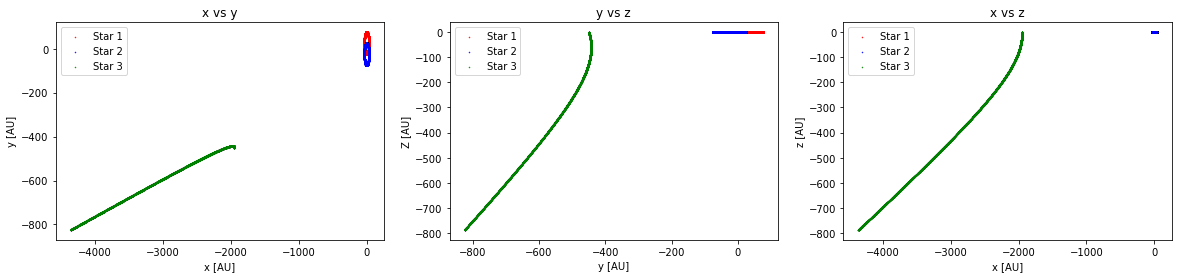

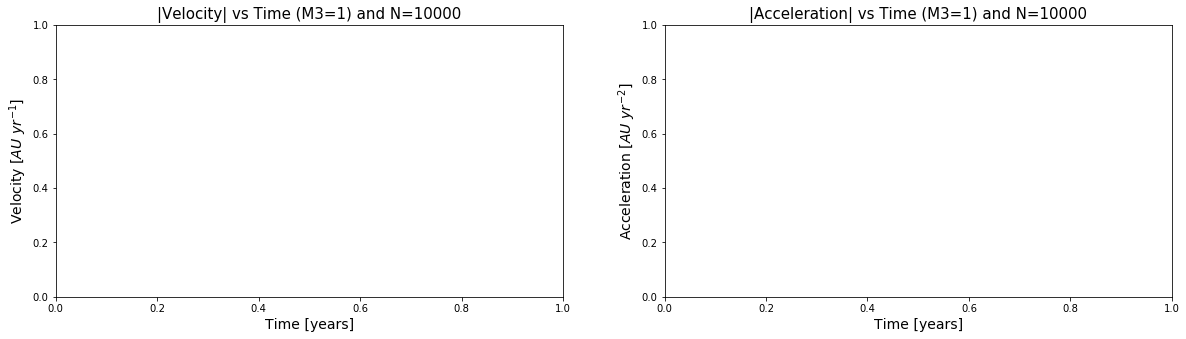

(<matplotlib.figure.Figure at 0x113a9e320>,
 <matplotlib.figure.Figure at 0x11434b5f8>)

In [106]:
calculate(10000,1)

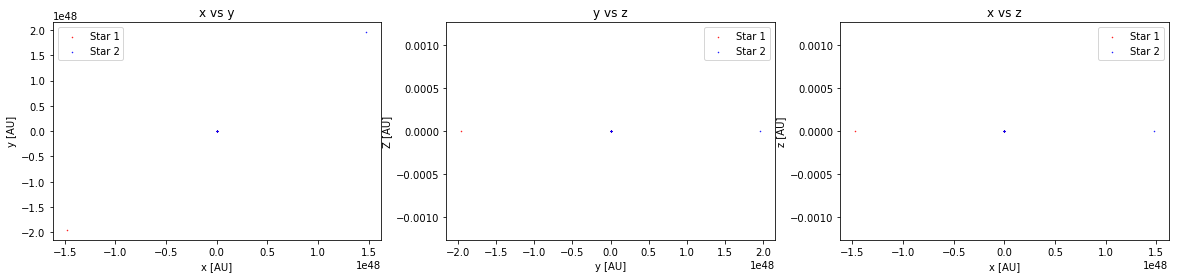

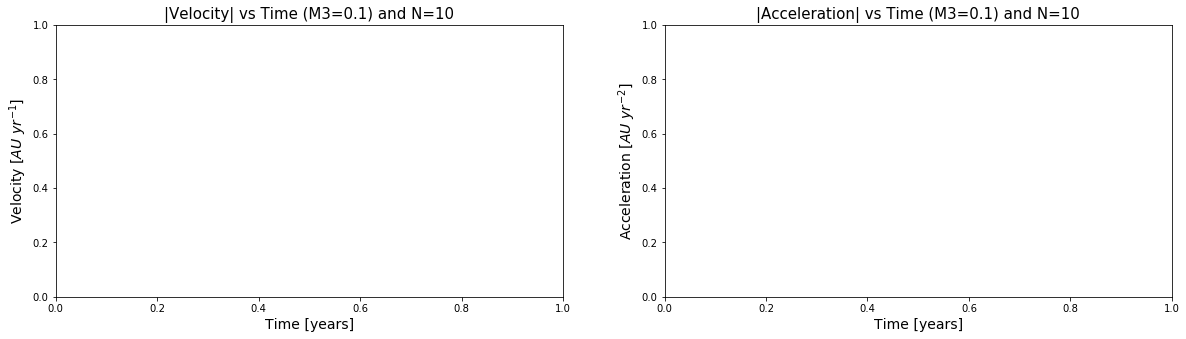

(<matplotlib.figure.Figure at 0x10bd244a8>,
 <matplotlib.figure.Figure at 0x111d26b70>)

In [96]:
calculate(10,0.1)

In [97]:
# fig1=plt.figure(figsize=(20,4))


# ax3=fig1.add_subplot(131)
# ax3.scatter(t,v1_x,c='r',marker='.',s=1)
# ax3.scatter(t,v2_x,c='b',marker='.',s=1)
# ax3.scatter(t,v3_x,c='g',marker='.',s=1)
# ax3.set_title('$v_x$ vs t')
# ax3.set_xlabel('t [years]')
# ax3.set_ylabel('v [AU $yr^{-1}$]')
# ax3.legend(legend)

# ax4=fig1.add_subplot(132)
# ax4.scatter(t,v1_y,c='r',marker='.',s=1)
# ax4.scatter(t,v2_y,c='b',marker='.',s=1)
# ax4.scatter(t,v3_y,c='g',marker='.',s=1)
# ax4.set_title('$v_y$ vs t')
# ax4.set_xlabel('t [years]')
# ax4.set_ylabel('v [AU $yr^{-1}$]')
# ax4.legend(legend)

# ax5=fig1.add_subplot(133)
# ax5.scatter(t,v1_z,c='r',marker='.',s=1)
# ax5.scatter(t,v2_z,c='b',marker='.',s=1)
# ax5.scatter(t,v3_z,c='g',marker='.',s=1)
# ax5.set_title('$v_z$ vs t')
# ax5.set_xlabel('t [years]')
# ax5.set_ylabel('v [AU $yr^{-1}$]')
# ax5.legend(legend)
# plt.show()


In [98]:
# fig2=plt.figure(figsize=(20,4))

# ax6=fig2.add_subplot(131)
# ax6.scatter(t,a1_x,c='r',marker='.',s=1)
# ax6.scatter(t,a2_x,c='b',marker='.',s=1)
# ax6.scatter(t,a3_x,c='g',marker='.',s=1)
# ax6.set_title('$a_x$ vs t')
# ax6.set_xlabel('t [years]')
# ax6.set_ylabel('a [AU $yr^{-2}$]')
# ax6.legend(legend)

# ax7=fig2.add_subplot(132)
# ax7.scatter(t,a1_y,c='r',marker='.',s=1)
# ax7.scatter(t,a2_y,c='b',marker='.',s=1)
# ax7.scatter(t,a3_y,c='g',marker='.',s=1)
# ax7.set_title('$a_y$ vs t')
# ax7.set_xlabel('t [years]')
# ax7.set_ylabel('a [AU $yr^{-2}$]')
# ax7.legend(legend)

# ax8=fig2.add_subplot(133)
# ax8.scatter(t,a1_z,c='r',marker='.',s=1)
# ax8.scatter(t,a2_z,c='b',marker='.',s=1)
# ax8.scatter(t,a3_z,c='g',marker='.',s=1)
# ax8.set_title('$a_z$ vs t')
# ax8.set_xlabel('t [years]')
# ax8.set_ylabel('a [AU $yr^{-2}$]')
# ax8.legend(legend)
# plt.show()


In [99]:
from scipy.integrate import odeint

In [100]:
a=2030/2
M3=1
p=2*np.pi*np.sqrt((a*a*a)/(G*(M1+M2)))#timesteps

N=1000

    #time star 3
t=np.linspace(0,p,N)
solver=odeint(f12,s1_ac,t,args=(1,M3))

TypeError: f12() missing 2 required positional arguments: 'star' and 'M3'

In [ ]:
r1=solver[:,0]
plt.plot(t,r1)
plt.show()


In [ ]:
e=(2000.0-30.0)/(2030.0)
theta0=delta+np.pi
thetaf=theta0+2*np.pi

theta=np.linspace(theta0,thetaf,1000)
r=(a*(1-e*e))/(1+e*np.cos(theta-delta))
print(e)

In [ ]:
print(r[500])
print(a*(1-e))

y=r*np.cos(theta+delta)
z=r*np.sin(theta+delta)
plt.plot(t,r)